# 感知器
这里展示的是比较简单的感知器算法。


## 参考
* 算法 https://www.bilibili.com/video/BV1V7411P7wL


## 数据预处理

In [2]:
import numpy as np 
import pandas as pd

In [3]:
data = pd.read_csv('\data\Iris.csv')
data.drop('Id', axis=1, inplace = True)
data.drop_duplicates(inplace = True)
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [4]:
data['Species'] = data['Species'].map({'Iris-versicolor':0, 'Iris-virginica':1, 'Iris-setosa':-1})
data = data[data['Species']!= 0 ]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


In [5]:
len(data)

97

## 感知器算法

In [10]:
class Perceptron:
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
    
    def step(self, z):
        return np.where(z >= 0, 1, -1) #用numpy的where判断数组z
        
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        self.w_ = np.zeros(1+X.shape[1])
        self.loss_ = []
        
        for i in range(self.times):
            #感知器是通过与每个z分量依次计算更新权重，逻辑回归则是使用所有样本计算梯度然后更新权重
            loss = 0
            for x, target in zip(X, y):
                y_hat = self.step(np.dot(x, self.w_[1:])+self.w_[0])
                # y_hat不等于target的时候预测不正确，判定为true=1,loss自增1
                # y_hat等于target的时候预测正确，判定为false=0,loss不增加
                loss += y_hat != target
                #更新权重
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat) * x
            self.loss_.append(loss)
    
    def predict(self, X):
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])
            
        

## 训练预测可视化

In [12]:
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == -1]
t1 = t1.sample(len(t1), random_state =0)
t2 = t2.sample(len(t2), random_state =0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis = 0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis = 0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis = 0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis = 0)

p = Perceptron(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
result

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
display(test_y.values)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [15]:
display(p.w_, p.loss_)

array([-0.4 , -0.44, -1.44,  1.88,  0.72])

[1, 2, 3, 2, 0, 0, 0, 0, 0, 0]

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

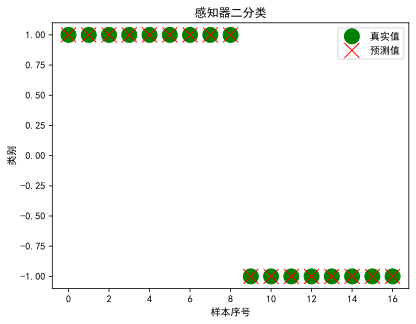

In [20]:
plt.plot(test_y.values, 'go',ms=15,label='真实值')
plt.plot(result, 'rx', ms=15, label = '预测值')
plt.title('感知器二分类')
plt.xlabel('样本序号')
plt.ylabel('类别')
plt.legend()
plt.show()

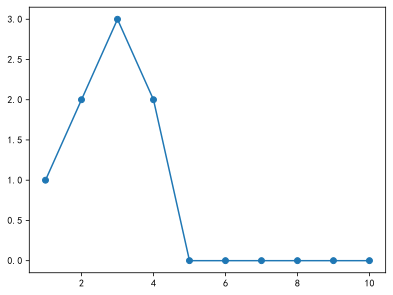

In [24]:
plt.plot(range(1,p.times +1), p.loss_, 'o-')